In [1]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as  plt
%matplotlib inline

In [2]:
img = cv2.imread('./dataset/lionel_messi/_111066400_messi.jpg')
img.shape

(576, 1024, 3)

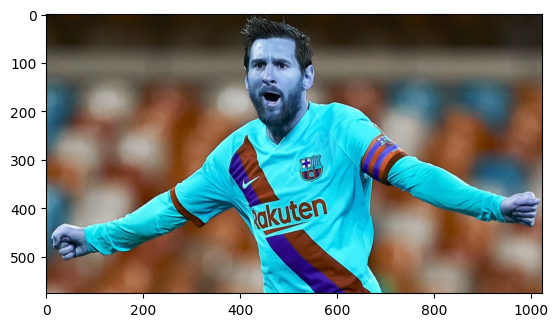

In [3]:
plt.imshow(img)

In [4]:
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grayimg.shape

(576, 1024)

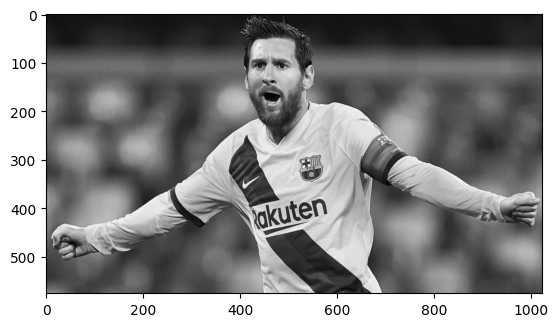

In [5]:
plt.imshow(grayimg, cmap = 'gray')

In [6]:
face_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_frontalface_default.xml")

In [ ]:
eye_cascade = cv2.CascadeClassifier("./opencv/haarcascades/haarcascade_eye.xml")
faces = face_cascade.detectMultiScale(grayimg,1.3,5)
faces

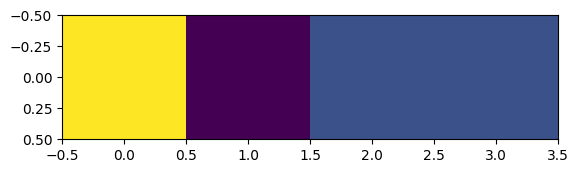

In [8]:
plt.imshow(faces)

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(394), np.int32(54), np.int32(138), np.int32(138))

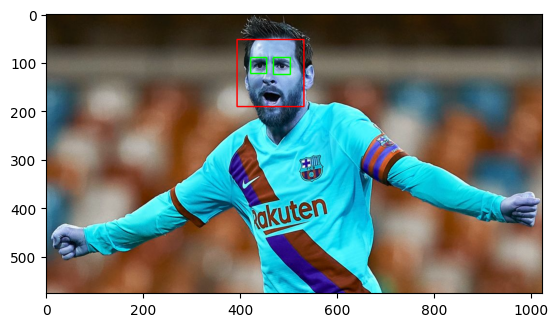

In [10]:
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = grayimg[y:y+h, x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

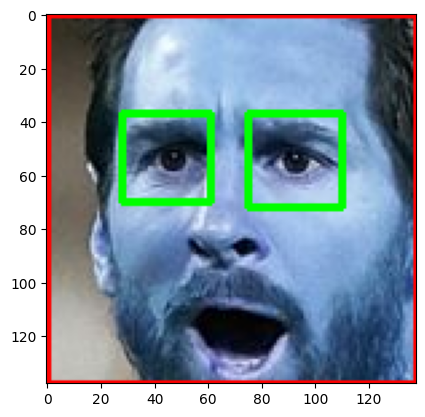

In [11]:
plt.imshow(roi_color,cmap = 'gray')

In [35]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image from path: {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

    return None


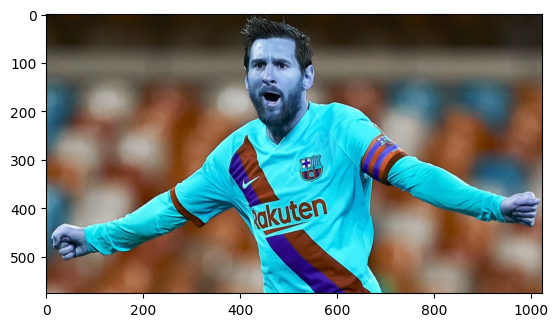

In [36]:
original_image = cv2.imread("./dataset/lionel_messi/_111066400_messi.jpg")
plt.imshow(original_image)

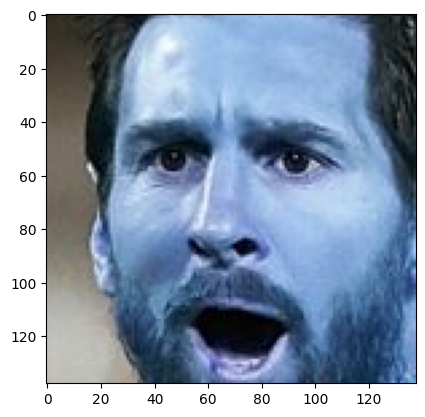

In [37]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/lionel_messi/_111066400_messi.jpg')
plt.imshow(cropped_image)

In [38]:
org_image = cv2.imread("./dataset/lionel_messi/10_MESSI_JUGADORS-WEB.jpg")

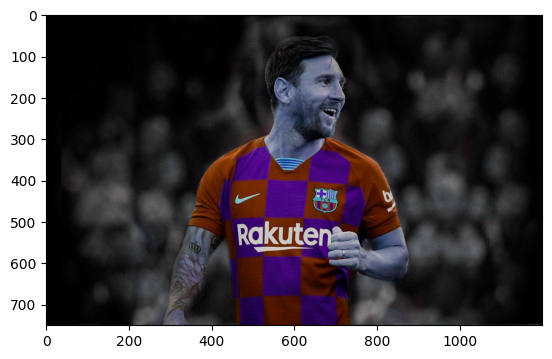

In [39]:
plt.imshow(org_image)

In [40]:
croppedimg2 = get_cropped_image_if_2_eyes('./dataset/lionel_messi/10_MESSI_JUGADORS-WEB.jpg')
croppedimg2

In [41]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [42]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [43]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [44]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [50]:
cropped_image_dirs = []
celebrity_file_names_dict= {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]

    celebrity_file_names_dict[celebrity_name] = []
    count = 0
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

Error: Could not load image from path: ./dataset/cropped\lionel_messi
Error: Could not load image from path: ./dataset/cropped\maria_sharapova
Error: Could not load image from path: ./dataset/cropped\roger_federer
Error: Could not load image from path: ./dataset/cropped\serena_williams
Error: Could not load image from path: ./dataset/cropped\virat_kohli
Error: Could not load image from path: ./dataset/lionel_messi\.ipynb_checkpoints
